In [99]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import io, transform
import matplotlib.colors as mcolors

%load_ext autoreload
%autoreload 2
import data_collection

In [108]:
ncolors = 256
color_array = plt.get_cmap('cool')(range(ncolors))

# change alpha values
color_array[:,-1] = np.linspace(0,1,ncolors)

# create a colormap object
map_object = mcolors.LinearSegmentedColormap.from_list(name='cool_alpha',colors=color_array)

# register this new colormap with matplotlib
plt.register_cmap(cmap=map_object)

In [111]:
KDE_RES = 1024

NYC_LAT_BOUNDS  = [40.4898, 40.9234]
NYC_LONG_BOUNDS = [-74.26883,-73.7045]

lat_flat = np.linspace(*NYC_LAT_BOUNDS, KDE_RES)
long_flat = np.linspace(*NYC_LONG_BOUNDS, KDE_RES)

kde, (synagogue_latlongs, yeshiva_latlongs, kosher_latlongs) = data_collection.build_kde_model()

bg = np.flip(transform.resize(io.imread('nyc_sc.png'), (KDE_RES, KDE_RES)),0)

x,y = np.meshgrid(long_flat,lat_flat)
grid_coords = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)

z = kde(grid_coords.T).reshape(KDE_RES,KDE_RES)

In [96]:
def scale_to_res(latlongs):
    lat_new = (latlongs[:,1]-lat_flat.min())/lat_flat.ptp()*KDE_RES
    long_new = (latlongs[:,0]-long_flat.min())/long_flat.ptp()*KDE_RES

    return long_new, lat_new

In [113]:
def make_figure(include_points=True, include_heatmap=True):
    plt.rcParams['figure.figsize'] = 20, 10

    plt.xlim(0,KDE_RES)
    plt.ylim(0,KDE_RES)

    plt.imshow(bg, aspect=long_flat.ptp()/lat_flat.ptp())
    if include_heatmap:
        plt.imshow(np.sqrt(z), aspect=long_flat.ptp()/lat_flat.ptp(), cmap='cool_alpha')
    plt.axis('off')

    x_s, y_s = scale_to_res(synagogue_latlongs)
    x_y, y_y = scale_to_res(yeshiva_latlongs)
    x_k, y_k = scale_to_res(kosher_latlongs)

    dot_size = 1
    
    if include_points:
        plt.scatter(x_s, y_s, s=dot_size, label='Synagogue')
        plt.scatter(x_y, y_y, s=dot_size, label='Yeshiva')
        plt.scatter(x_k, y_k, s=dot_size, label='Kosher Restaurant')

        plt.legend()

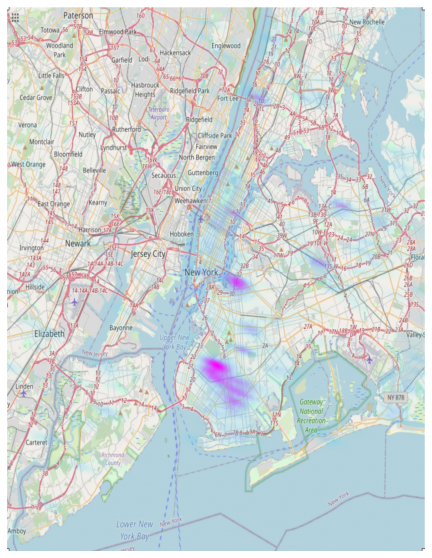

In [116]:
make_figure(include_points=False)

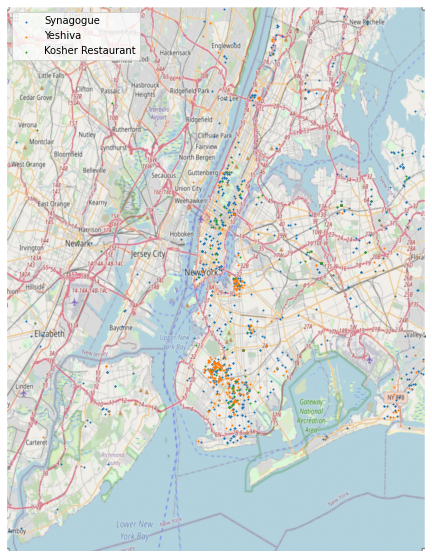

In [117]:
make_figure(include_heatmap=False)

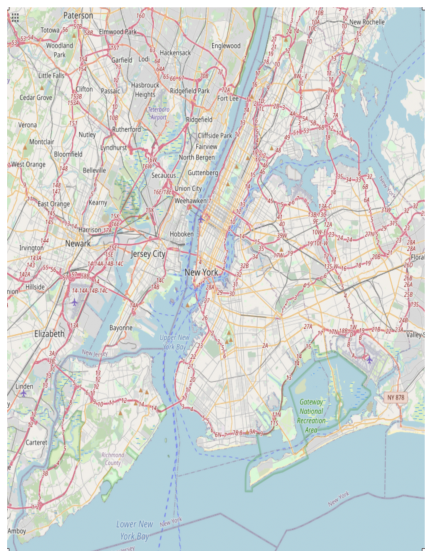

In [118]:
make_figure(include_heatmap=False, include_points=False)

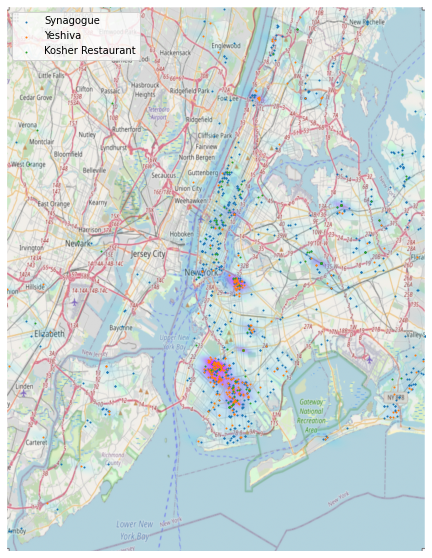

In [119]:
make_figure(include_heatmap=True, include_points=True)